data/pills-blue.npy: (67111, 13) -> (9588, 13)
axes: (4, 2)
key = k, size=30: t=0.40949296951293945
key = r, size=30: t=0.6217103004455566
key = k, size=50: t=0.5110843181610107
key = r, size=50: t=0.9711971282958984
key = k, size=100: t=0.6279549598693848
key = r, size=100: t=1.9645707607269287
key = k, size=150: t=0.7261302471160889
key = r, size=150: t=2.9138519763946533


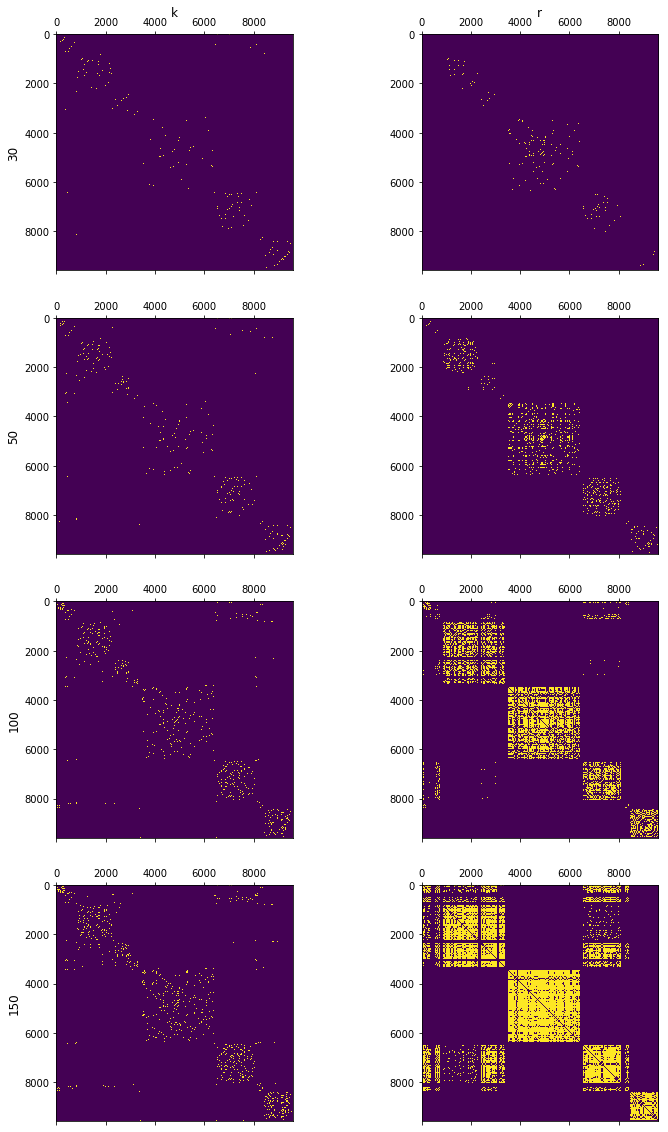

In [5]:
# --------------------------------------------------
#
# knn vs rnn on Pills-Blue
#
# --------------------------------------------------



import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph


MAX_SIZE = 10000
FILE = 'data/pills-blue.npy'
SIZES = [30, 50, 100, 150]



def subsample(data, max_size=10000):
    if len(data) > max_size:
        sub_sample = round(len(data) / max_size)
        data = data[::sub_sample]
    return data

def knn(data, k=100):
    t0 = time.time()
    graph = kneighbors_graph(data, k, include_self=False, n_jobs=-1)
    elapsed_time = time.time() - t0
    return graph, elapsed_time

def rnn(data, r=100):
    t0 = time.time()
    graph = radius_neighbors_graph(data, r, include_self=False, n_jobs=-1)
    elapsed_time = time.time() - t0
    return graph, elapsed_time


X = np.load(FILE)
old_shape = X.shape
X = subsample(X, MAX_SIZE)
print("{}: {} -> {}".format(FILE, old_shape, X.shape))


def comp(key, size):
    if key == 'k':
        return knn(X, size)
    else:
        return rnn(X, size)

fig, axes = plt.subplots(nrows=len(SIZES), ncols=2, figsize=(12,20))
print('axes:', axes.shape)

for j,size in enumerate(SIZES):
    for i,key in enumerate(['k', 'r']):
        ax = axes[j][i]
        graph, t = comp(key, size)
        print('key = {}, size={}: t={}'.format(key,size,t))
        ax.matshow(graph.toarray())

# set col/row labels
cols = ['k', 'r']
rows = SIZES
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size='large')
plt.show()

data/run-pink.npy: (63039, 13) -> (10507, 13)
axes: (4, 2)
k=30: 0.5321800708770752
r=150: 0.5034561157226562
k=50: 0.622197151184082
r=300: 0.9124867916107178
k=100: 0.7373039722442627
r=500: 1.9241588115692139
k=250: 0.9665095806121826
r=750: 2.431560754776001


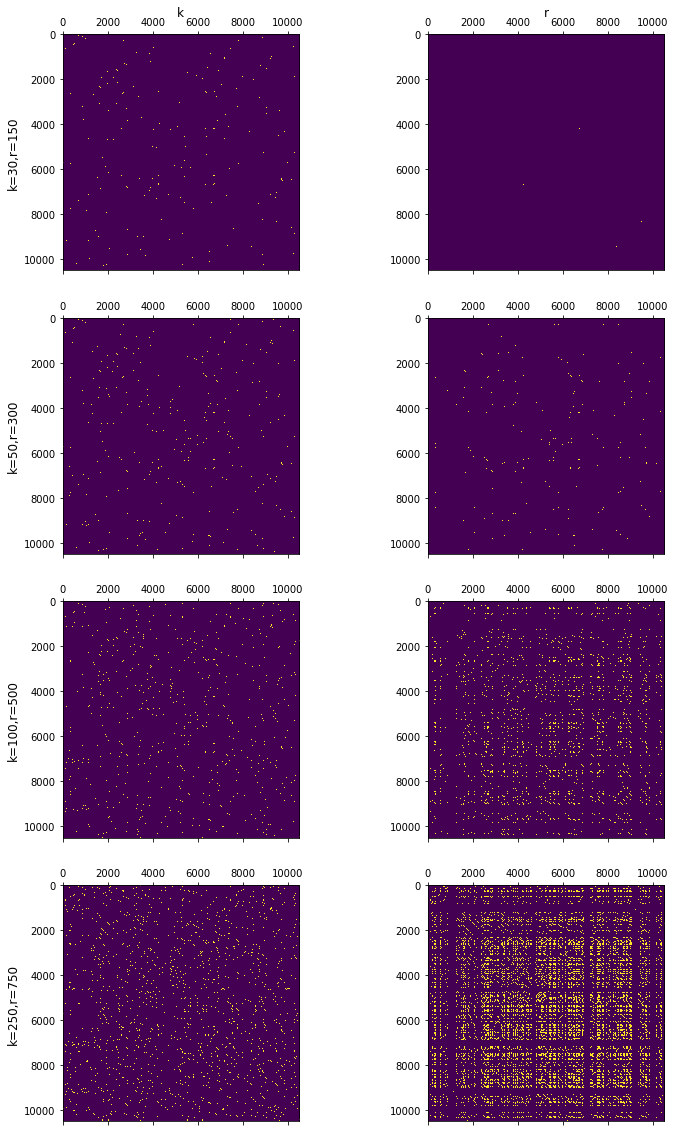

In [1]:
# --------------------------------------------------
#
# knn and rnn on Run-Pink
#
# --------------------------------------------------


%matplotlib inline

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph


MAX_SIZE = 10000
FILE = 'data/run-pink.npy'
SIZES = [(30, 150), (50, 300), (100, 500), (250, 750)]



def subsample(data, max_size=10000):
    if len(data) > max_size:
        sub_sample = round(len(data) / max_size)
        data = data[::sub_sample]
    return data

def knn(data, k=100):
    t0 = time.time()
    graph = kneighbors_graph(data, k, include_self=False, n_jobs=-1)
    elapsed_time = time.time() - t0
    return graph, elapsed_time

def rnn(data, r=100):
    t0 = time.time()
    graph = radius_neighbors_graph(data, r, include_self=False, n_jobs=-1)
    elapsed_time = time.time() - t0
    return graph, elapsed_time


X = np.load(FILE)
old_shape = X.shape
X = subsample(X, MAX_SIZE)
print("{}: {} -> {}".format(FILE, old_shape, X.shape))


fig, axes = plt.subplots(nrows=len(SIZES), ncols=2, figsize=(12,20))
print('axes:', axes.shape)

for j,(k,r) in enumerate(SIZES):
    # knn
    ax = axes[j][0]
    graph, t = knn(X, k)
    print('k={}: {}'.format(k,t))
    ax.matshow(graph.toarray())
    # rnn
    ax = axes[j][1]
    graph, t = rnn(X, r)
    print('r={}: {}'.format(r,t))
    ax.matshow(graph.toarray())
# set col/row labels
cols = ['k', 'r']
rows = ['k={},r={}'.format(k,r) for (k,r) in SIZES]
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size='large')
plt.show()